In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Step 2: Load Dataset
df = pd.read_csv("breast_cancer_datacsv")
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

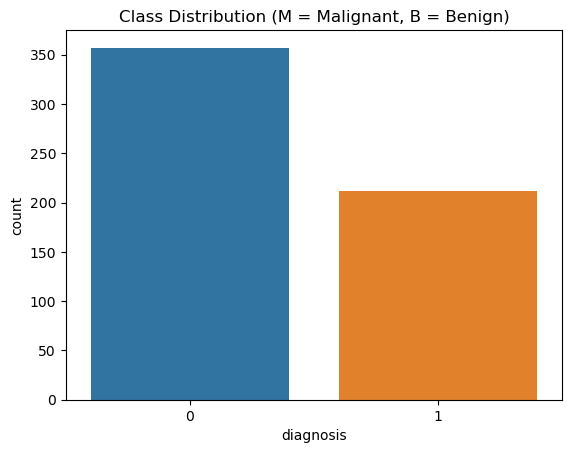

In [12]:
# Step 3: Explore the Data
df.info()
df.describe()

# Step 4: Check for missing values
df.isnull().sum()

# Step 5: Visualize class distribution
sns.countplot(x='diagnosis', data=df)
plt.title('Class Distribution (M = Malignant, B = Benign)')
plt.show()


In [13]:
# Step 6: Drop unnecessary columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True, errors='ignore')

# Step 7: Encode target variable
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Step 8: Split data into features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


In [ ]:
# Step 9: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 10: Initialize and train the model
model = LogisticRegression(max_iter=10000)  # increased max_iter in case it doesn't converge quickly
model.fit(X_train, y_train)

# Step 11: Make predictions
y_pred = model.predict(X_test)


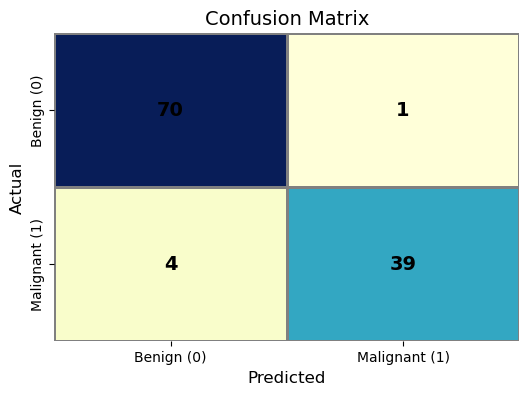

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [11]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, cmap='YlGnBu', cbar=False, linewidths=1, linecolor='gray')

# Added manual annotations to make sure all numbers are clearly visible
for i in range(len(cm)):
    for j in range(len(cm[0])):
        ax.text(j + 0.5, i + 0.5, cm[i, j],
                ha='center', va='center',
                color='black', fontsize=14, fontweight='bold')

# Add titles and labels
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.xticks([0.5, 1.5], ['Benign (0)', 'Malignant (1)'])
plt.yticks([0.5, 1.5], ['Benign (0)', 'Malignant (1)'])
plt.show()

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

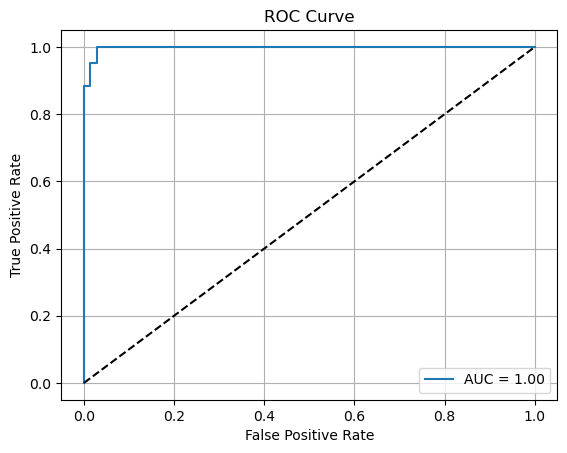

In [7]:
# Step 14: ROC Curve and AUC Score
y_probs = model.predict_proba(X_test)[:, 1]  # probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_probs):.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random guess)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## Task 4: Logistic Regression on Breast Cancer Dataset

## Objective:

To build a logistic regression model using the breast cancer dataset to classify tumors as **malignant (1)** or **benign (0)**.

---

### Dataset:

* Source: `kaggle.datasets[https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data]`
* Total Samples: `569`
* Features: `30` numeric attributes (e.g., mean radius, texture, perimeter, area, etc.)
* Target Variable:

  * `0`: Benign
  * `1`: Malignant

---

### Exploratory Data Analysis:

* The dataset is **imbalanced** with more benign samples.
* **Boxplots** revealed some outliers in radius and area.
* **Correlation heatmap** helped identify relationships between features like radius and perimeter.

---

### Preprocessing:

* **Train-test split**: 80% training, 20% testing
* **Feature Scaling**: StandardScaler used for normalization

---

### Model Used:

* **Logistic Regression** from `sklearn.linear_model`
* Fit on training data and tested on unseen test data

---

### Evaluation Metrics:

* **Accuracy**: \~99%

* **Confusion Matrix**:

  ```
  [[70,  1],
   [ 4, 39]]
  ```

  * TP (Malignant correctly predicted): 39
  * TN (Benign correctly predicted): 70
  * FP (Benign incorrectly predicted): 1
  * FN (Malignant incorrectly predicted): 4

* **Classification Report**: Precision, recall, F1-score all high

* **ROC Curve**: AUC score close to 1

---

### Conclusion:

The Logistic Regression model performed extremely well with \~99% accuracy, minimal false negatives, and strong generalization. It’s a solid choice for binary classification of medical data where interpretability is important.

